<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%202/Modulo_2_Ejercicio_4_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 4: Análisis Exploratorio y Visualización Avanzada

## Objetivo
En este ejercicio, realizarás un análisis exploratorio avanzado sobre el dataset **Iris**, enriquecido con nuevas variables (calculadas en el ejercicio 3). El objetivo es:

- **Obtener un resumen estadístico** tanto global como por grupo (por especie).
- **Visualizar la distribución** de cada variable numérica (usando histogramas y boxplots).
- **Explorar relaciones** entre variables mediante scatter plots y pairplots.
- **Identificar relaciones** a través de una matriz de correlación y visualizarla con un heatmap.
- **Reflexionar** sobre los hallazgos y cómo estos podrían orientar un análisis predictivo.

Usaremos el dataset Iris que, además de las medidas originales, incluye dos nuevas variables:
- **sepal_area:** producto de "sepal length (cm)" por "sepal width (cm)".
- **petal_area:** producto de "petal length (cm)" por "petal width (cm)".

> **Pregunta de Reflexión:**  
> ¿Qué insights crees que puedes obtener al analizar las áreas de sépalo y pétalo junto con las medidas originales?  
> ¿Cómo podrían estas nuevas variables influir en la clasificación de las especies?

¡Comencemos!


In [1]:
# Paso 1: Importa las librerías necesarias y carga el dataset Iris desde scikit-learn.

# TODO: Importa pandas y scikit-learn para cargar el dataset, además de matplotlib y seaborn para las visualizaciones.
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# Carga el dataset Iris utilizando load_iris con as_frame=True para obtener un DataFrame.
iris = load_iris(as_frame=True)
df_iris = iris.frame

# Agrega un identificador único para cada muestra: 'sample_id'
df_iris.reset_index(inplace=True)
df_iris.rename(columns={"index": "sample_id"}, inplace=True)

# Crea las nuevas variables:
# - 'sepal_area' = 'sepal length (cm)' * 'sepal width (cm)'
# - 'petal_area' = 'petal length (cm)' * 'petal width (cm)'
df_iris["sepal_area"] = df_iris["sepal length (cm)"] * df_iris["sepal width (cm)"]
df_iris["petal_area"] = df_iris["petal length (cm)"] * df_iris["petal width (cm)"]

# Visualiza las primeras filas del DataFrame integrado.
print("Primeras filas del dataset integrado (Iris enriquecido):")
display(df_iris.head())


Primeras filas del dataset integrado (Iris enriquecido):


,sample_id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,petal_area
0,0,5.1,3.5,1.4,0.2,0,17.85,0.28
1,1,4.9,3.0,1.4,0.2,0,14.70,0.28
2,2,4.7,3.2,1.3,0.2,0,15.04,0.26
3,3,4.6,3.1,1.5,0.2,0,14.26,0.30
4,4,5.0,3.6,1.4,0.2,0,18.00,0.28


In [2]:
# Paso 2: Obtener estadísticas descriptivas generales.

# TODO: Calcula y muestra las estadísticas descriptivas generales usando df_iris.describe()
print("Estadísticas descriptivas generales:")
display(df_iris.describe())

# TODO: Calcula estadísticas descriptivas por grupo (por ejemplo, por la columna 'target' o la especie).
# Nota: Puedes usar el método groupby para agrupar por la columna 'target' (o usa iris.target_names para interpretar).
print("Estadísticas descriptivas por grupo (target):")
display(df_iris.groupby('target').describe())

# Reflexiona: ¿Qué diferencias observas entre los grupos?


Estadísticas descriptivas generales:


,sample_id,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal_area,petal_area
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,74.500000,5.843333,3.057333,3.758000,1.199333,1.000000,17.822867,5.794067
std,43.445368,0.828066,0.435866,1.765298,0.762238,0.819232,3.361854,4.712390
min,0.000000,4.300000,2.000000,1.000000,0.100000,0.000000,10.000000,0.110000
25%,37.250000,5.100000,2.800000,1.600000,0.300000,0.000000,15.660000,0.420000
50%,74.500000,5.800000,3.000000,4.350000,1.300000,1.000000,17.660000,5.615000
75%,111.750000,6.400000,3.300000,5.100000,1.800000,2.000000,20.325000,9.690000
max,149.000000,7.900000,4.400000,6.900000,2.500000,2.000000,30.020000,15.870000


Estadísticas descriptivas por grupo (target):


sample_id                                                        \
           count   mean       std    min     25%    50%     75%    max   
target                                                                   
0           50.0   24.5  14.57738    0.0   12.25   24.5   36.75   49.0   
1           50.0   74.5  14.57738   50.0   62.25   74.5   86.75   99.0   
2           50.0  124.5  14.57738  100.0  112.25  124.5  136.75  149.0   

       sepal length (cm)         ... sepal_area        petal_area           \
                   count   mean  ...        75%    max      count     mean   
target                           ...                                         
0                   50.0  5.006  ...    19.1550  25.08       50.0   0.3656   
1                   50.0  5.936  ...    18.4950  22.40       50.0   5.7204   
2                   50.0  6.588  ...    21.4125  30.02       50.0  11.2962   

                                                      
             std   min     25%     50%    75%    max  
target                                                
0       0.181155  0.11  0.2800   0.300   0.42   0.96  
1       1.368403  3.30  4.8600   5.615   6.75   8.64  
2       2.157412  7.50  9.7175  11.445  12.79  15.87  

[3 rows x 56 columns]

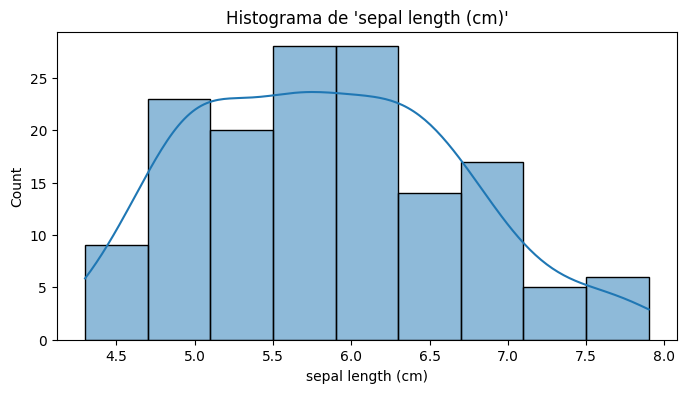

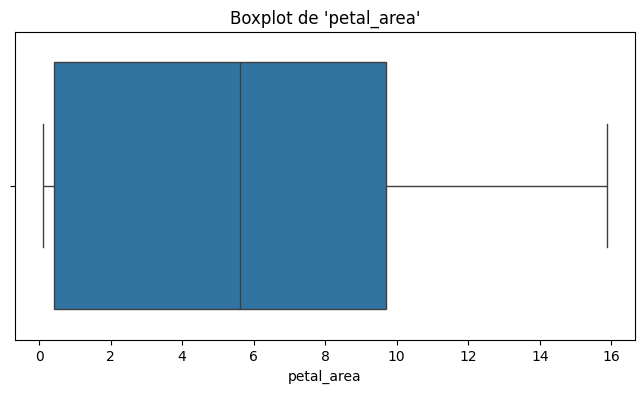

In [3]:
# Paso 3: Visualizaciones individuales para cada variable numérica.

# TODO: Crea un histograma para la variable 'sepal length (cm)'.
plt.figure(figsize=(8,4))
sns.histplot(df_iris["sepal length (cm)"], kde=True)
plt.title("Histograma de 'sepal length (cm)'")
plt.xlabel("sepal length (cm)")
plt.show()

# TODO: Crea un diagrama de caja (boxplot) para la variable 'petal_area'.
plt.figure(figsize=(8,4))
sns.boxplot(x=df_iris["petal_area"])
plt.title("Boxplot de 'petal_area'")
plt.xlabel("petal_area")
plt.show()

# Puedes repetir para otras variables según lo desees.


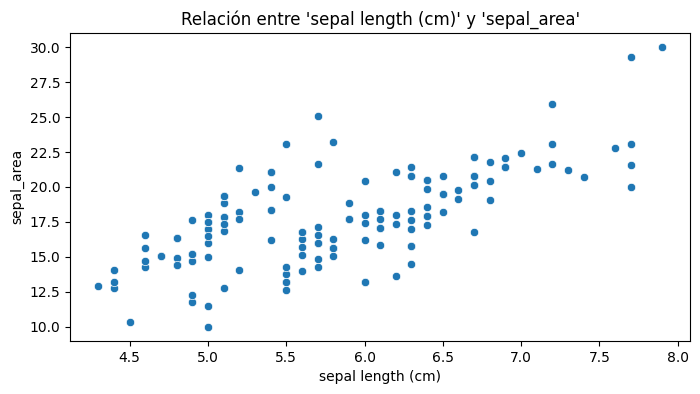

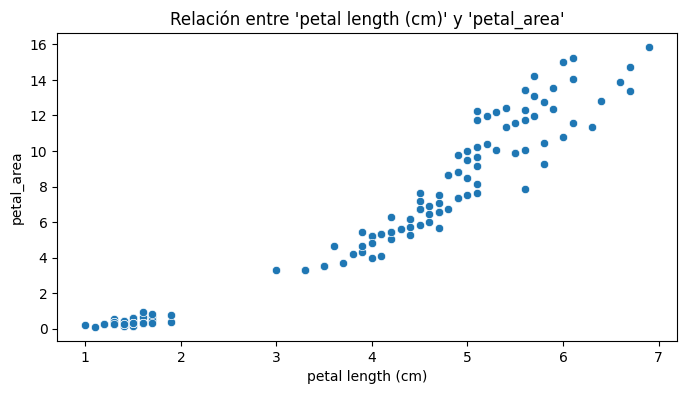

In [4]:
# Paso 4: Visualizar relaciones entre variables.

# TODO: Crea un scatter plot para examinar la relación entre 'sepal length (cm)' y 'sepal_area'.
plt.figure(figsize=(8,4))
sns.scatterplot(x=df_iris["sepal length (cm)"], y=df_iris["sepal_area"])
plt.title("Relación entre 'sepal length (cm)' y 'sepal_area'")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal_area")
plt.show()

# TODO: Crea otro scatter plot para 'petal length (cm)' vs. 'petal_area'.
plt.figure(figsize=(8,4))
sns.scatterplot(x=df_iris["petal length (cm)"], y=df_iris["petal_area"])
plt.title("Relación entre 'petal length (cm)' y 'petal_area'")
plt.xlabel("petal length (cm)")
plt.ylabel("petal_area")
plt.show()


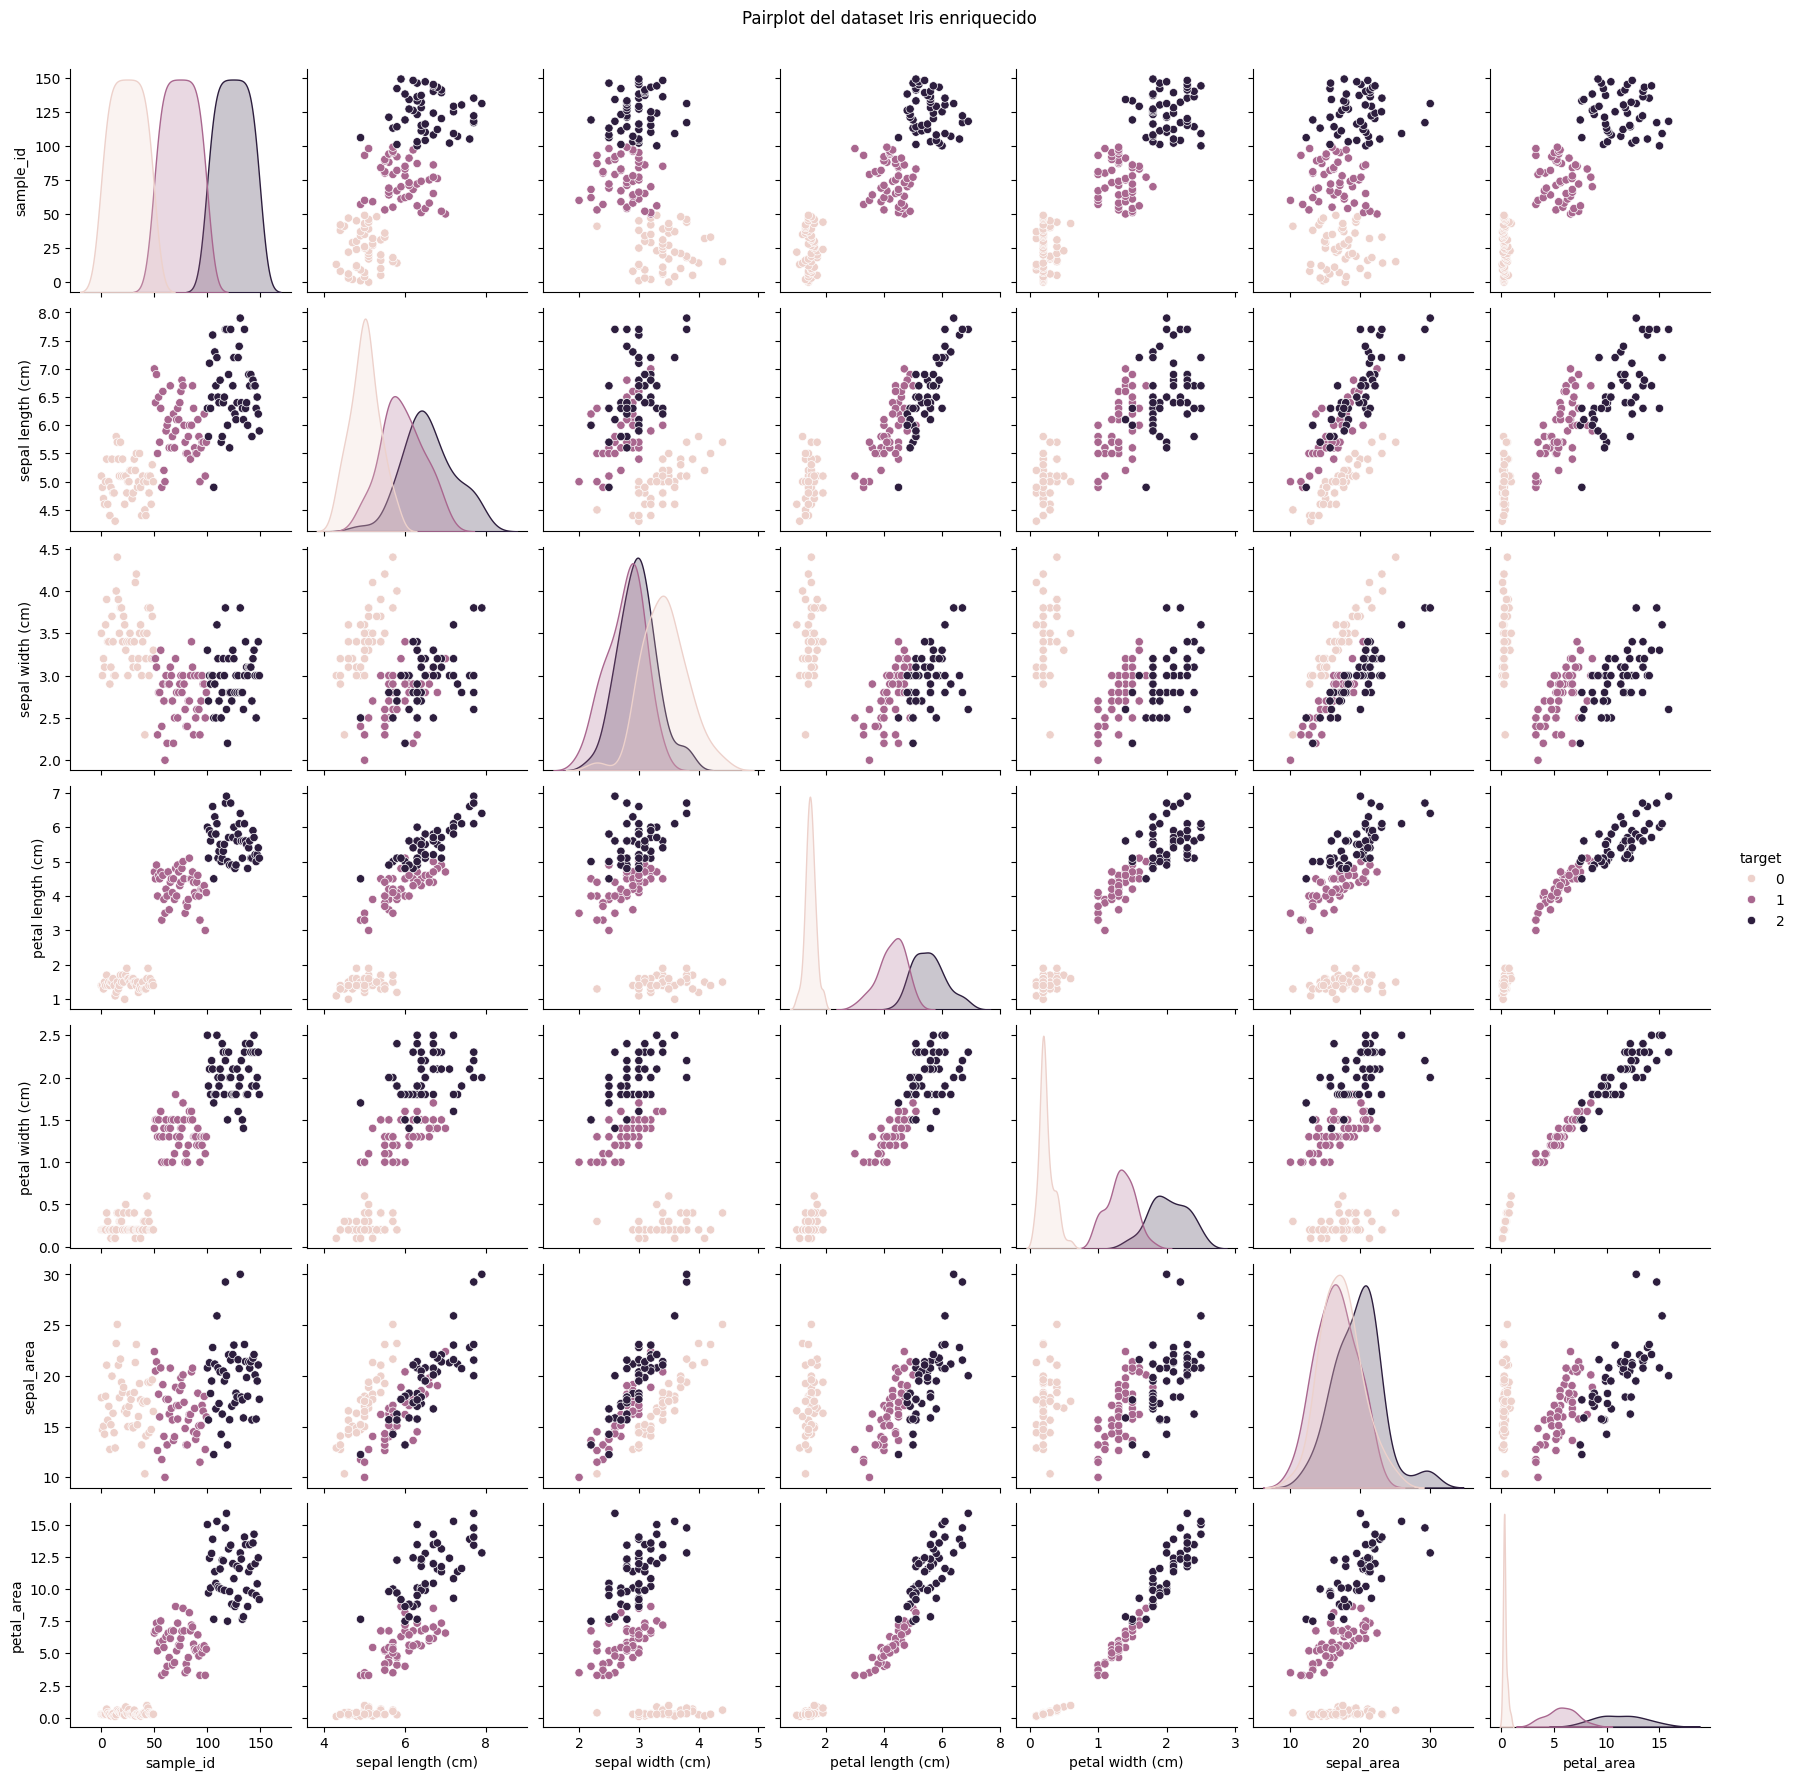

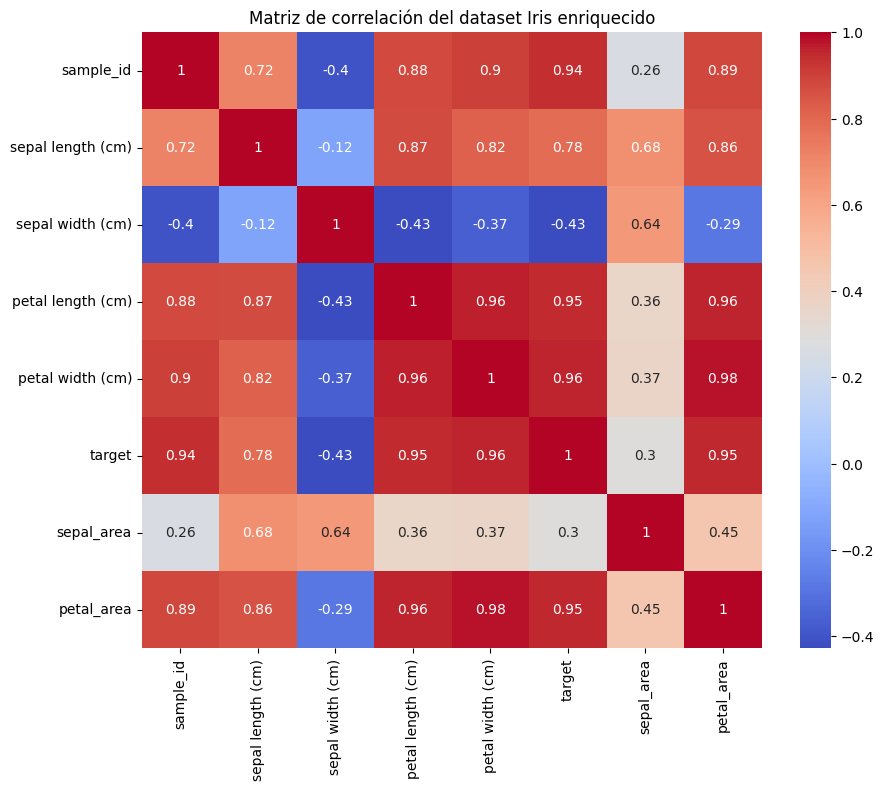

In [5]:
# Paso 5: Visualizaciones avanzadas para explorar todas las relaciones.

# TODO: Crea un pairplot utilizando seaborn para visualizar todas las variables numéricas (incluyendo las nuevas áreas)
sns.pairplot(df_iris, hue="target", diag_kind="kde")
plt.suptitle("Pairplot del dataset Iris enriquecido", y=1.02)
plt.show()

# TODO: Calcula la matriz de correlación y visualízala con un heatmap.
plt.figure(figsize=(10,8))
correlation_matrix = df_iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación del dataset Iris enriquecido")
plt.show()


In [6]:
# Paso 7: Sistema de testeo para validar algunos aspectos del análisis

# Este bloque de código verificará:
# 1. Que el DataFrame integrado tenga 150 registros (tamaño del dataset Iris).
# 2. Que las columnas 'sepal_area' y 'petal_area' existan en el DataFrame.
# 3. Que la matriz de correlación tenga forma (n x n) correspondiente a todas las variables numéricas.

# Test 1: Número de filas.
expected_rows = 150
actual_rows = df_iris.shape[0]
assert actual_rows == expected_rows, f"Test fallido: Se esperaban {expected_rows} filas, pero se encontraron {actual_rows}."

# Test 2: Verificar que las columnas derivadas existen.
assert "sepal_area" in df_iris.columns, "Test fallido: La columna 'sepal_area' no se encontró."
assert "petal_area" in df_iris.columns, "Test fallido: La columna 'petal_area' no se encontró."

# Test 3: Verificar la forma de la matriz de correlación.
num_numeric_cols = df_iris.select_dtypes(include='number').shape[1]
corr_shape = correlation_matrix.shape
assert corr_shape == (num_numeric_cols, num_numeric_cols), f"Test fallido: Se esperaba una matriz de correlación de forma ({num_numeric_cols}, {num_numeric_cols}), pero se obtuvo {corr_shape}."

print("Todos los tests se han pasado correctamente. El análisis exploratorio y las visualizaciones se han generado como se esperaba.")


Todos los tests se han pasado correctamente. El análisis exploratorio y las visualizaciones se han generado como se esperaba.


## Reflexión Final

1. ¿Qué patrones o relaciones interesantes observaste en la matriz de correlación? ¿Qué variables parecen estar fuertemente correlacionadas?
2. Al observar el pairplot, ¿qué diferencias puedes notar en las distribuciones de las variables según la especie (target)?
3. ¿Cómo podrían las variables derivadas (sepal_area y petal_area) aportar información adicional para un modelo de clasificación?
4. ¿Qué visualización te pareció la más útil para comprender la estructura del dataset y por qué?

_Responde estas preguntas en una celda Markdown adicional o en un comentario._
